<a href="https://colab.research.google.com/github/adyr16/Capstone/blob/main/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#IMPORT LIBRARIES

import pandas as pd
import regex as re

import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

True

# DATA READING & UNDERSTANDING

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/adyr16/Capstone/main/sample30.csv')
df.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [4]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
df.isnull().any()

id                      False
brand                   False
categories              False
manufacturer             True
name                    False
reviews_date             True
reviews_didPurchase      True
reviews_doRecommend      True
reviews_rating          False
reviews_text            False
reviews_title            True
reviews_userCity         True
reviews_userProvince     True
reviews_username         True
user_sentiment           True
dtype: bool

In [6]:
print("Summary statistics of numerical features : \n", df.describe())
print("\nTotal number of reviews: ",len(df))
print("\nTotal number of brands: ", len(list(set(df['brand']))))
print("\nTotal number of unique products: ", len(list(set(df['name']))))

Summary statistics of numerical features : 
        reviews_rating
count    30000.000000
mean         4.483133
std          0.988441
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000

Total number of reviews:  30000

Total number of brands:  214

Total number of unique products:  271


In [7]:
print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df[df['user_sentiment']=="Negative"]["reviews_text"].count()/len(df)*100))

print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(df[df['user_sentiment']=="Positive"]["reviews_text"].count()/len(df)*100))


Percentage of reviews with negative sentiment : 11.22%

Percentage of reviews with positive sentiment : 88.77%


In [8]:
#Derive New Feature - "review_all_text". Since we will be working on analysis of textual data of reviews, we merge "reviews_text" & "reviews_title" into a single column
# concatenating 'reviews_title' with 'reviews_text' column into a new column 'review_all_text'
df["review_all_text"]= df["reviews_text"].str.cat(df["reviews_title"].copy(), sep =" ", na_rep = " ")  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
 15  review_all_text       30000 non-null

In [9]:
df.head(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment,review_all_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive,i love this album. it's very good. more to the...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive,Good flavor. This review was collected as part...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive,Good flavor. Good
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative,I read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative,My husband bought this gel for us. The gel cau...


In [10]:
df.shape

(30000, 16)

In [11]:
df.isnull().sum()

id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
review_all_text             0
dtype: int64

Here we see missing values in some of the columns :


In [12]:
# Checking missing values percentages for columns
missing = round(100*(df.isnull().sum()/len(df.id)), 2)
missing.loc[missing > 0]

manufacturer             0.47
reviews_date             0.15
reviews_didPurchase     46.89
reviews_doRecommend      8.57
reviews_title            0.63
reviews_userCity        93.57
reviews_userProvince    99.43
reviews_username         0.21
dtype: float64

In [13]:
missing_val_col = list(missing[missing >= 90].index)
len(missing_val_col)

2

Here we can see missing values in columns "reviews_userProvince" & "reviews_username" > 90. So we will be not considering this for our analysis

#DATA PREPARATION & CLEANING

In [14]:
#Copying original dataframe another dataframe
reviews_df = df.copy()

In [15]:
reviews_df.shape

(30000, 16)

In [16]:
#DROP COLUMNS : - reviews_userCity ,reviews_userProvince, reviews_title, reviews_text
reviews_df = reviews_df.drop(['reviews_userCity','reviews_userProvince','reviews_title','reviews_text'], axis=1)

In [17]:
print(reviews_df.shape)
print(reviews_df.info())

(30000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         29859 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_didPurchase  15932 non-null  object
 7   reviews_doRecommend  27430 non-null  object
 8   reviews_rating       30000 non-null  int64 
 9   reviews_username     29937 non-null  object
 10  user_sentiment       29999 non-null  object
 11  review_all_text      30000 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.7+ MB
None


In [18]:
# Checking missing values percentages for columns
missing = round(100*(reviews_df.isnull().sum()/len(reviews_df.id)), 2)
missing.loc[missing > 0.0]

manufacturer            0.47
reviews_date            0.15
reviews_didPurchase    46.89
reviews_doRecommend     8.57
reviews_username        0.21
dtype: float64

In [19]:
reviews_df.isnull().sum()

id                         0
brand                      0
categories                 0
manufacturer             141
name                       0
reviews_date              46
reviews_didPurchase    14068
reviews_doRecommend     2570
reviews_rating             0
reviews_username          63
user_sentiment             1
review_all_text            0
dtype: int64

In [20]:
#further dropping columns not relevant for our analysis
reviews_df = reviews_df.drop(['reviews_doRecommend','reviews_didPurchase'], axis=1)

In [21]:
reviews_df.shape

(30000, 10)

In [22]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   brand             30000 non-null  object
 2   categories        30000 non-null  object
 3   manufacturer      29859 non-null  object
 4   name              30000 non-null  object
 5   reviews_date      29954 non-null  object
 6   reviews_rating    30000 non-null  int64 
 7   reviews_username  29937 non-null  object
 8   user_sentiment    29999 non-null  object
 9   review_all_text   30000 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.3+ MB


In [23]:
reviews_df = reviews_df.dropna(axis=0, subset=['user_sentiment'])

In [24]:
reviews_df.shape

(29999, 10)

In [25]:
reviews_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_username,user_sentiment,review_all_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,joshua,Positive,i love this album. it's very good. more to the...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,dorothy w,Positive,Good flavor. This review was collected as part...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,dorothy w,Positive,Good flavor. Good
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,rebecca,Negative,I read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,walker557,Negative,My husband bought this gel for us. The gel cau...


In [26]:
reviews_df.drop_duplicates(subset=None, inplace=True)

In [27]:
reviews_df.shape

(29984, 10)

# EXPLORATORY DATA ANALYSIS & DATA VISUALSATION

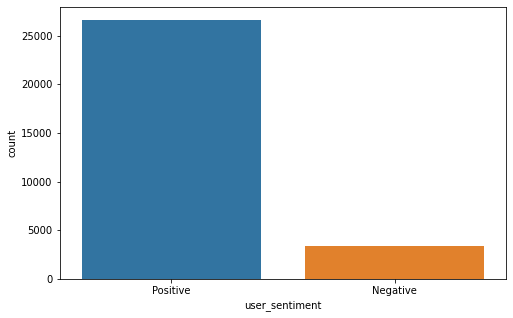

In [28]:
# Distribution of user_sentiment
plt.figure(figsize=(8,5))
sns.countplot(x='user_sentiment',data=reviews_df)
plt.show()

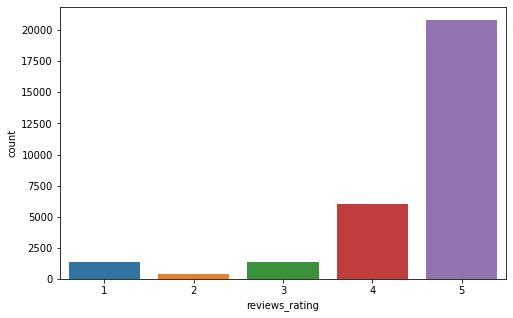

In [29]:
# Distribution of rating
plt.figure(figsize=(8,5))
sns.countplot(x='reviews_rating',data=reviews_df)
plt.show()

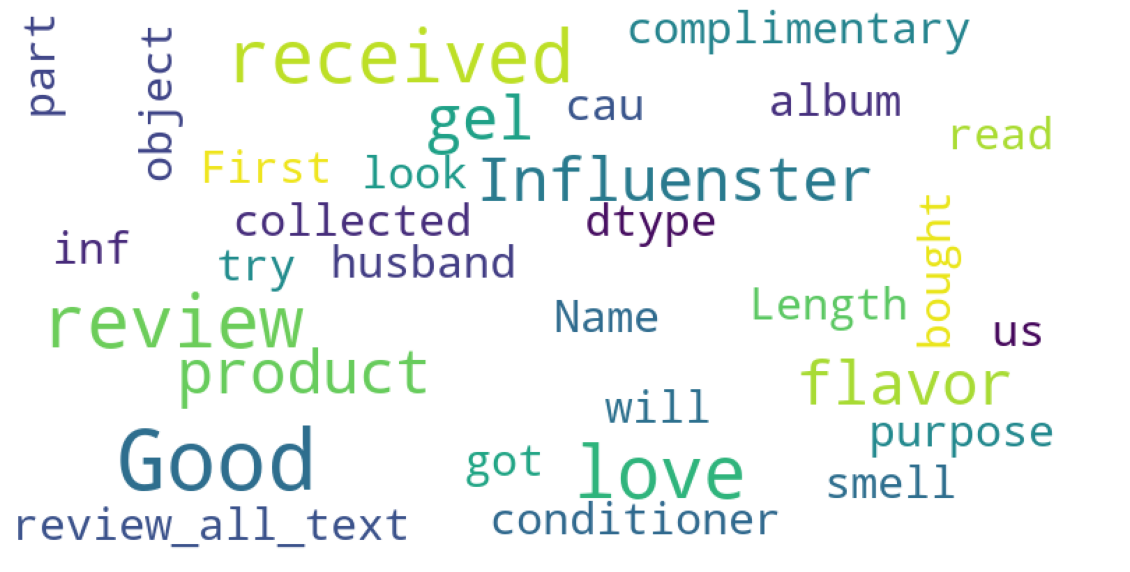

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords_wc = set(STOPWORDS)
def wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords_wc,
        max_words=500,
        max_font_size=30,
        scale=2,
        random_state=5 #chosen a andom by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(20, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

wordcloud(reviews_df['review_all_text'])

#DATA PREPROCESSING

####Here we preprocess the text data - the textual data where we will perform our sentiment analysis & build model.
"review_all_text" column contains the reviews of the product & 'user_sentiment' column contains the sentiments as "positive" or negative in text data.

*Steps:

  1- Convert to lowercase
  2- Remove punctuation
  3- Remove special chars
  4- Remove hyperlinks, email address & urls
  5- Remove emojis


In [31]:
##Convert to lower case
reviews_df['review_all_text'] = reviews_df['review_all_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews_df['review_all_text'].head()

0    i love this album. it's very good. more to the...
1    good flavor. this review was collected as part...
2                                    good flavor. good
3    i read through the reviews on here before look...
4    my husband bought this gel for us. the gel cau...
Name: review_all_text, dtype: object

In [32]:
reviews_df['user_sentiment'] = reviews_df['user_sentiment'].str.lower()

In [33]:
reviews_df.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_username,user_sentiment,review_all_text
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,joshua,positive,i love this album. it's very good. more to the...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,dorothy w,positive,good flavor. this review was collected as part...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,dorothy w,positive,good flavor. good
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,rebecca,negative,i read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,walker557,negative,my husband bought this gel for us. the gel cau...


In [34]:
#REMOVE PUNCTUATION
import string
def remove_punctuation(text):     
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


In [35]:
reviews_df['review_all_text'] = reviews_df['review_all_text'].apply(lambda x: remove_punctuation(x))

In [36]:
reviews_df['review_all_text']

0        i love this album its very good more to the hi...
1        good flavor this review was collected as part ...
2                                         good flavor good
3        i read through the reviews on here before look...
4        my husband bought this gel for us the gel caus...
                               ...                        
29995    i got this conditioner with influenster to try...
29996    i love it  i received this for review purposes...
29997    first of all i love the smell of this product ...
29998    i received this through influenster and will n...
29999    i received this product complimentary from inf...
Name: review_all_text, Length: 29984, dtype: object

In [37]:
#REMOVE EMOJIS

def remove_emojis(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [38]:
reviews_df['review_all_text'] = reviews_df['review_all_text'].apply(lambda x: remove_emojis(x))

In [39]:
reviews_df.shape

(29984, 10)

In [40]:
# REMOVE SPECIAL CHARACTERS, @ symbols, date & time

#remove words which are starts with @ symbols
reviews_df['review_all_text'] = reviews_df['review_all_text'].map(lambda x:re.sub('@\w*','',str(x)))
#removing data and time (numeric values)
reviews_df['review_all_text'] = reviews_df['review_all_text'].map(lambda x:re.sub('[0-9]','',str(x)))
#removing special characters
reviews_df['review_all_text'] = reviews_df['review_all_text'].map(lambda x:re.sub('[#|*|$|:|\\|&]','',str(x)))

In [41]:
#REMOVE URLS

# remove url link starting with http
reviews_df['review_all_text'] = reviews_df['review_all_text'].map(lambda x:re.sub('http.*','',str(x)))
# remove link starts with www
reviews_df['review_all_text'] = reviews_df['review_all_text'].map(lambda x:re.sub('www.*','',str(x)))
# remove url link starting with http
reviews_df['review_all_text'] = reviews_df['review_all_text'].map(lambda x:re.sub('https.*','',str(x)))

In [42]:
reviews_df['review_all_text']

0        i love this album its very good more to the hi...
1        good flavor this review was collected as part ...
2                                         good flavor good
3        i read through the reviews on here before look...
4        my husband bought this gel for us the gel caus...
                               ...                        
29995    i got this conditioner with influenster to try...
29996    i love it  i received this for review purposes...
29997    first of all i love the smell of this product ...
29998    i received this through influenster and will n...
29999    i received this product complimentary from inf...
Name: review_all_text, Length: 29984, dtype: object

In [43]:
reviews_df.shape

(29984, 10)

In [44]:
#remove stopwords
stop = stopwords.words('english')
reviews_df['review_all_text'] = reviews_df['review_all_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
reviews_df['review_all_text'].head(5)

0    love album good hip hop side current pop sound...
1     good flavor review collected part promotion good
2                                     good flavor good
3    read reviews looking buying one couples lubric...
4    husband bought gel us gel caused irritation fe...
Name: review_all_text, dtype: object

In [45]:
#Tokenization & Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

def preprocess(document):
    # tokenize into words
    words = word_tokenize(document)
    
    # lemmatization
    words = [wordnet_lemmatizer.lemmatize(token) for token in words]
    
    # join words to make sentence
    document = " ".join(words)
    
    return document

In [46]:
reviews_df['review_all_text']= reviews_df['review_all_text'].apply(lambda x: preprocess(x))
reviews_df['review_all_text'].head(20)

0     love album good hip hop side current pop sound...
1      good flavor review collected part promotion good
2                                      good flavor good
3     read review looking buying one couple lubrican...
4     husband bought gel u gel caused irritation fel...
5     boyfriend bought spice thing bedroom highly di...
6     bought earlier today excited check based produ...
7     bought product husband try impressed tingling ...
8     husband bought extra fun werevboth extremely d...
9     got surprise husband nothing special lube save...
10    tried husband felt different effect change fir...
11    purchased thinking would sort warming effect o...
12    bought enhance time bit abslutely nothing disa...
13    bought really liking n variety nothing like di...
14    first time purchase type product maybe expecte...
15    bought tried wife enjoy feel anything enhancem...
16    bought product spice thing fianc didnt anythin...
17    bought try spice thing felt nothing disapp

# MODEL BUILDING

#### TEST-TRAIN SPLIT & FEATURE EXTRACTION

In [47]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split

# Split data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(reviews_df['review_all_text'], reviews_df['user_sentiment'],test_size=0.20, random_state=100)

In [48]:
print(X_train.shape)
print(X_test.shape)

(23987,)
(5997,)


In [49]:
print(y_train.shape)
print(y_test.shape)

(23987,)
(5997,)


In [50]:
X_train.head()

21424    called nexxus bought new gel let know old form...
2434       really funny movie loved better expecting funny
24514    ive loved godzilla since child helped forget a...
19286    love love love wipe leave house always clean u...
22293    found movie entertaining think tyler perry gre...
Name: review_all_text, dtype: object

In [51]:
#applying TF-IDF vecorizer to extract feature names for X_train
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(X_train)

In [52]:
print(vectorizer.get_feature_names)
print("Number of features : %d \n" %len(vectorizer.get_feature_names()))

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)>
Number of features : 17410 



In [53]:
print(features.toarray)

<bound method _cs_matrix.toarray of <23987x17410 sparse matrix of type '<class 'numpy.float64'>'
	with 408595 stored elements in Compressed Sparse Row format>>


In [54]:
print("Displaying some feature names : \n", vectorizer.get_feature_names()[::10])

Displaying some feature names : 
 ['aaa', 'abandoned', 'abomb', 'absence', 'absorbing', 'acapulco', 'accessable', 'accommodate', 'accomplishment', 'accurately', 'ache', 'acne', 'acrylic', 'actionalot', 'actionpacked', 'activist', 'actress', 'adaptation', 'addicting', 'addressed', 'adjustable', 'administratorfrom', 'admitttedly', 'adult', 'adventure', 'advice', 'afew', 'affter', 'afro', 'againand', 'agegroup', 'aggressive', 'agonizing', 'agreenot', 'ahhhhhhhh', 'aint', 'airdry', 'airshaft', 'al', 'alblum', 'aldo', 'alexs', 'alikethe', 'allergen', 'alljust', 'allows', 'almost', 'alreadyits', 'alter', 'altitude', 'amaze', 'amazingit', 'ambi', 'aminah', 'amountso', 'amy', 'andean', 'android', 'angst', 'anna', 'annoyed', 'anouther', 'anti', 'antilotion', 'anxiety', 'anyones', 'anywhere', 'apollo', 'appeared', 'apple', 'apply', 'approach', 'apps', 'aqua', 'area', 'argan', 'armor', 'aroud', 'arrayed', 'arsenic', 'artificial', 'ashley', 'asleep', 'assemble', 'assignment', 'asssurance', 'asthma

In [55]:
# class imbalance
y_train.value_counts()/y_train.shape

positive    0.887606
negative    0.112394
Name: user_sentiment, dtype: float64

In [56]:
file = '/content/gdrive/MyDrive/Capstone/vectorizer.pkl'
pickle.dump(vectorizer, open(file, 'wb'))

#### SMOTE METHOD TO HANDLE CLASS IMBALANCE

In [57]:
# !pip install imblearn

In [58]:
from imblearn.over_sampling import SMOTE 
from collections import Counter
from sklearn.datasets import make_classification

In [59]:
counter = Counter(y_train)
print('Before',counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()

X_train_sm, y_train_sm = smt.fit_resample(features, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({'positive': 21291, 'negative': 2696})
After Counter({'positive': 21291, 'negative': 21291})


In [60]:
X_train_sm.shape

(42582, 17410)

### LOGISTIC REGRESSION

##### Classic Logistic Regression 

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [62]:
# Fit and transform the training data to a document-term matrix using TfidfVectorizer 
tfidf = TfidfVectorizer(min_df=5) #minimum document frequency of 5
X_train_tfidf = tfidf.fit_transform(X_train)
print("Number of features : %d \n" %len(tfidf.get_feature_names())) #1722
print("Show some feature names : \n", tfidf.get_feature_names()[::1000])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

Number of features : 4488 

Show some feature names : 
 ['aaron', 'dedicated', 'improvement', 'puff', 'throwing']


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
import numpy as np
# Look at the top 10 features with smallest and the largest coefficients
feature_names = np.array(tfidf.get_feature_names())
sorted_coef_index = lr.coef_[0].argsort()
print('\nTop 10 features with smallest coefficients :\n{}\n'.format(feature_names[sorted_coef_index[:10]]))
print('Top 10 features with largest coefficients : \n{}'.format(feature_names[sorted_coef_index[:-11:-1]]))


Top 10 features with smallest coefficients :
['disappointed' 'sick' 'horrible' 'terrible' 'bad' 'nasty' 'awful' 'evil'
 'dirty' 'hate']

Top 10 features with largest coefficients : 
['great' 'love' 'clean' 'easy' 'best' 'good' 'better' 'nice' 'loved'
 'many']


In [64]:
def modelEvaluation(predictions):
    '''
    Print model evaluation to predicted result 
    '''
    print ("\nAccuracy on test set: {:.4f}".format(accuracy_score(y_test, predictions)))
    # print("\nAUC score : {:.4f}".format(roc_auc_score(y_test, predictions)))
    print("\nClassification report : \n", metrics.classification_report(y_test, predictions))
    print("\nConfusion Matrix : \n", metrics.confusion_matrix(y_test, predictions))


In [65]:
# Evaluate on the test set
predictions = lr.predict(tfidf.transform(X_test))
modelEvaluation(predictions)


Accuracy on test set: 0.9095

Classification report : 
               precision    recall  f1-score   support

    negative       0.81      0.25      0.38       671
    positive       0.91      0.99      0.95      5326

    accuracy                           0.91      5997
   macro avg       0.86      0.62      0.67      5997
weighted avg       0.90      0.91      0.89      5997


Confusion Matrix : 
 [[ 167  504]
 [  39 5287]]


##### Logistic Regression with Hyperparameter Tuning

In [66]:
# Building a pipeline
estimators = [("tfidf", TfidfVectorizer()), ("lr", LogisticRegression())]
model = Pipeline(estimators)

# Grid search
params = {"lr__C":[0.1, 1, 10], #regularization param of logistic regression
          "tfidf__min_df": [1, 3], #min count of words 
          "tfidf__max_features": [1000, None], #max features
          "tfidf__ngram_range": [(1,1), (1,2)], #1-grams or 2-grams
          "tfidf__stop_words": ["english"]} #use stopwords or don't

grid = GridSearchCV(estimator=model, param_grid=params, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)
print("The best paramenter set is : \n", grid.best_params_)


# Evaluate on the validaton set
predictions = grid.predict(X_test)
modelEvaluation(predictions)

The best paramenter set is : 
 {'lr__C': 10, 'tfidf__max_features': None, 'tfidf__min_df': 3, 'tfidf__ngram_range': (1, 2), 'tfidf__stop_words': 'english'}

Accuracy on test set: 0.9205

Classification report : 
               precision    recall  f1-score   support

    negative       0.75      0.44      0.55       671
    positive       0.93      0.98      0.96      5326

    accuracy                           0.92      5997
   macro avg       0.84      0.71      0.75      5997
weighted avg       0.91      0.92      0.91      5997


Confusion Matrix : 
 [[ 293  378]
 [  99 5227]]


### MULTINOMIAL NAIVE BAYES

In [67]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_sm, y_train_sm)

nb.score(X_train_sm, y_train_sm)

0.8861725611760838

In [68]:
X_test_vect = vectorizer.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype='<U8')

In [69]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report : \n", metrics.classification_report(y_test, y_pred))

Accuracy: 82.72%

COnfusion Matrix:
 [[ 434  237]
 [ 799 4527]]

Classification report : 
               precision    recall  f1-score   support

    negative       0.35      0.65      0.46       671
    positive       0.95      0.85      0.90      5326

    accuracy                           0.83      5997
   macro avg       0.65      0.75      0.68      5997
weighted avg       0.88      0.83      0.85      5997



### BERNOULLI NAIVE BAYES

In [71]:
from sklearn.naive_bayes import BernoulliNB

In [72]:
ber_model = BernoulliNB()
ber_model.fit(X_train_sm,y_train_sm)
y_pred_bern=ber_model.predict(X_test_vect)

In [73]:
accuracy_score(y_test,y_pred_bern)

0.8485909621477405

In [74]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_bern) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred_bern))
print("\nClassification report : \n", metrics.classification_report(y_test, y_pred_bern))

Accuracy: 84.86%

COnfusion Matrix:
 [[ 221  450]
 [ 458 4868]]

Classification report : 
               precision    recall  f1-score   support

    negative       0.33      0.33      0.33       671
    positive       0.92      0.91      0.91      5326

    accuracy                           0.85      5997
   macro avg       0.62      0.62      0.62      5997
weighted avg       0.85      0.85      0.85      5997



In [75]:
# pickle.dump(ber_model,"/content/gdrive/MyDrive/Capstone/ber_naivebayes.pkl")

### SVM

In [76]:
from sklearn.svm import SVC

In [77]:
svm_model = SVC()

In [78]:
svm_model.fit(X_train_sm,y_train_sm)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [79]:
y_pred_svm = svm_model.predict(X_test_vect)

In [80]:
accuracy_score(y_test,y_pred_svm)

0.918625979656495

In [81]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_svm) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification report : \n", metrics.classification_report(y_test, y_pred_svm))

Accuracy: 91.86%

COnfusion Matrix:
 [[ 236  435]
 [  53 5273]]

Classification report : 
               precision    recall  f1-score   support

    negative       0.82      0.35      0.49       671
    positive       0.92      0.99      0.96      5326

    accuracy                           0.92      5997
   macro avg       0.87      0.67      0.72      5997
weighted avg       0.91      0.92      0.90      5997



#### KNN CLASSIFIER

In [82]:
from sklearn.neighbors import KNeighborsClassifier

In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_sm,y_train_sm)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [84]:
y_pred_knn = knn_model.predict(X_test_vect)

In [85]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification report : \n", metrics.classification_report(y_test, y_pred_knn))

Accuracy: 42.64%

COnfusion Matrix:
 [[ 600   71]
 [3369 1957]]

Classification report : 
               precision    recall  f1-score   support

    negative       0.15      0.89      0.26       671
    positive       0.96      0.37      0.53      5326

    accuracy                           0.43      5997
   macro avg       0.56      0.63      0.40      5997
weighted avg       0.87      0.43      0.50      5997



### RANDOM FOREST CLASSIFIER

In [86]:
from sklearn.ensemble import RandomForestClassifier
ess_model = RandomForestClassifier()
ess_model.fit(X_train_sm,y_train_sm)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [87]:
y_pred_rfc = ess_model.predict(X_test_vect)

In [88]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rfc) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred_rfc))
print("\nClassification report : \n", metrics.classification_report(y_test, y_pred_rfc))

Accuracy: 90.70%

COnfusion Matrix:
 [[ 262  409]
 [ 149 5177]]

Classification report : 
               precision    recall  f1-score   support

    negative       0.64      0.39      0.48       671
    positive       0.93      0.97      0.95      5326

    accuracy                           0.91      5997
   macro avg       0.78      0.68      0.72      5997
weighted avg       0.89      0.91      0.90      5997



#### DECISION TREES

In [89]:
from sklearn import tree

tree_model = tree.DecisionTreeClassifier()

In [90]:
tree_model.fit(X_train_sm,y_train_sm)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [91]:
y_pred_dt = tree_model.predict(X_test_vect)

In [92]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_dt) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification report : \n", metrics.classification_report(y_test, y_pred_dt))

Accuracy: 85.93%

COnfusion Matrix:
 [[ 351  320]
 [ 524 4802]]

Classification report : 
               precision    recall  f1-score   support

    negative       0.40      0.52      0.45       671
    positive       0.94      0.90      0.92      5326

    accuracy                           0.86      5997
   macro avg       0.67      0.71      0.69      5997
weighted avg       0.88      0.86      0.87      5997



### Logistic Regression with Balanced Dataset

In [93]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_sm, y_train_sm)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
y_pred_lr = lr.predict(X_test_vect)

In [95]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_lr) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification report : \n", metrics.classification_report(y_test, y_pred_lr))

Accuracy: 87.79%

COnfusion Matrix:
 [[ 535  136]
 [ 596 4730]]

Classification report : 
               precision    recall  f1-score   support

    negative       0.47      0.80      0.59       671
    positive       0.97      0.89      0.93      5326

    accuracy                           0.88      5997
   macro avg       0.72      0.84      0.76      5997
weighted avg       0.92      0.88      0.89      5997



In [96]:
filename = '/content/gdrive/MyDrive/Capstone/lr_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

In [97]:
model = pickle.load(open('/content/gdrive/MyDrive/Capstone/lr_model.pkl','rb'))

### XG-Boost

In [99]:
import xgboost as xgb

In [100]:
xgb=xgb.XGBClassifier()

In [101]:
xgb.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [102]:
y_pred_xgb = xgb.predict(X_test_vect)

In [103]:
xgb_accuracy=accuracy_score(y_pred_xgb,y_test)

In [104]:
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_xgb) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("\nClassification report : \n", metrics.classification_report(y_test, y_pred_xgb))

Accuracy: 83.21%

COnfusion Matrix:
 [[ 427  244]
 [ 763 4563]]

Classification report : 
               precision    recall  f1-score   support

    negative       0.36      0.64      0.46       671
    positive       0.95      0.86      0.90      5326

    accuracy                           0.83      5997
   macro avg       0.65      0.75      0.68      5997
weighted avg       0.88      0.83      0.85      5997



# RECOMMENDATION SYSTEM

In [105]:
#Check data
reviews_df.shape

(29984, 10)

In [106]:
reviews_df.isnull().sum()

id                    0
brand                 0
categories            0
manufacturer        141
name                  0
reviews_date         46
reviews_rating        0
reviews_username     63
user_sentiment        0
review_all_text       0
dtype: int64

In [107]:
data = reviews_df.copy()

In [108]:
data.shape

(29984, 10)

In [109]:
data = data.dropna(axis=0, subset=['reviews_username'])                                  

In [110]:
#subsetting data to perform analysis
review_data = data[['id','name', 'reviews_rating','reviews_username']]  

In [111]:
review_data.shape

(29921, 4)

In [112]:
print(review_data.shape)
print(review_data.isnull().sum())

(29921, 4)
id                  0
name                0
reviews_rating      0
reviews_username    0
dtype: int64


In [113]:
# Test and Train split of the dataset.
from sklearn.model_selection import train_test_split
train, test = train_test_split(review_data, test_size=0.30, random_state=31)

In [114]:
print(train.shape)
print(test.shape)

(20944, 4)
(8977, 4)


In [115]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20944 entries, 5984 to 21264
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                20944 non-null  object
 1   name              20944 non-null  object
 2   reviews_rating    20944 non-null  int64 
 3   reviews_username  20944 non-null  object
dtypes: int64(1), object(3)
memory usage: 818.1+ KB


In [116]:
new_df = pd.pivot_table(train,index=['reviews_username'], columns = 'name', values = "reviews_rating").fillna(0)

In [117]:
print(new_df.shape)
print(new_df.head())

(18220, 258)
name              0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest  ...  Yes To Grapefruit Rejuvenating Body Wash
reviews_username                                                                 ...                                          
00sab00                                                         0.0              ...                                       0.0
01impala                                                        0.0              ...                                       0.0
02dakota                                                        0.0              ...                                       0.0
0325home                                                        0.0              ...                                       0.0
06stidriver                                                     0.0              ...                                       0.0

[5 rows x 258 columns]


In [118]:
### Creating dummy train & dummy test dataset

dummy_train = train.copy()

In [119]:
dummy_train.head()

,id,name,reviews_rating,reviews_username
5984,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),5,portalbird704
6681,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,4,mommy98
18684,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,4,babe
28199,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,captjac
2548,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),5,mrb76


In [120]:
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

In [121]:
dummy_train = pd.pivot_table(dummy_train,index=['reviews_username'], columns = 'name', values = "reviews_rating").fillna(1)

In [122]:
print(dummy_train.shape)

(18220, 258)


# User Similarity Matrix

In [123]:
new_df.index.nunique()

18220

In [124]:
from sklearn.metrics.pairwise import pairwise_distances

# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(new_df, metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [125]:
user_correlation.shape

(18220, 18220)

## Using adjusted Cosine

##### Here, we are not removing the NaN values and calculating the mean only for the movies rated by the user

In [126]:
new_df.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0

### Normalising the rating of the movie for each user around 0 mean

In [127]:
mean = np.nanmean(new_df, axis=1)
df_subtracted = (new_df.T-mean).T

In [128]:
df_subtracted.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,-0.015504,-0.0155

In [129]:
df_subtracted.shape

(18220, 258)

#### Finding Cosine Similarity

In [130]:
from sklearn.metrics.pairwise import pairwise_distances

In [131]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

[[ 1.         -0.00492759 -0.00492759 ... -0.00492759 -0.00492759
  -0.00492759]
 [-0.00492759  1.          1.         ... -0.00389105 -0.00389105
  -0.00389105]
 [-0.00492759  1.          1.         ... -0.00389105 -0.00389105
  -0.00389105]
 ...
 [-0.00492759 -0.00389105 -0.00389105 ...  1.          1.
   1.        ]
 [-0.00492759 -0.00389105 -0.00389105 ...  1.          1.
   1.        ]
 [-0.00492759 -0.00389105 -0.00389105 ...  1.          1.
   1.        ]]


In [132]:
user_correlation.shape

(18220, 18220)

In [134]:
file = '/content/gdrive/MyDrive/Capstone/user_correlation.pkl'
pickle.dump(user_correlation, open(file, 'wb'))

## Prediction - User User
Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [135]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 1.]])

In [136]:
user_predicted_ratings = np.dot(user_correlation, new_df.fillna(0))
user_predicted_ratings

array([[ 0.        ,  1.3780338 ,  0.        , ..., 12.61689129,
         2.0786935 ,  1.11613113],
       [ 0.        , 29.68980731,  0.        , ..., 24.37133452,
         1.75293536,  3.7349456 ],
       [ 0.        , 29.68980731,  0.        , ..., 24.37133452,
         1.75293536,  3.7349456 ],
       ...,
       [ 0.        ,  2.64269432,  0.        , ..., 14.15552633,
         0.        ,  0.        ],
       [ 0.        ,  2.64269432,  0.        , ..., 14.15552633,
         0.        ,  0.        ],
       [ 0.        ,  2.64269432,  0.        , ..., 14.15552633,
         0.        ,  0.        ]])

In [137]:
user_predicted_ratings.shape

(18220, 258)

In [138]:
user_predicted_ratings

array([[ 0.        ,  1.3780338 ,  0.        , ..., 12.61689129,
         2.0786935 ,  1.11613113],
       [ 0.        , 29.68980731,  0.        , ..., 24.37133452,
         1.75293536,  3.7349456 ],
       [ 0.        , 29.68980731,  0.        , ..., 24.37133452,
         1.75293536,  3.7349456 ],
       ...,
       [ 0.        ,  2.64269432,  0.        , ..., 14.15552633,
         0.        ,  0.        ],
       [ 0.        ,  2.64269432,  0.        , ..., 14.15552633,
         0.        ,  0.        ],
       [ 0.        ,  2.64269432,  0.        , ..., 14.15552633,
         0.        ,  0.        ]])

In [139]:
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,1.378034,0.0,

In [140]:
file = '/content/gdrive/MyDrive/Capstone/user_final_rating.pkl'
pickle.dump(user_final_rating, open(file, 'wb'))

In [141]:
reco = pickle.load(open('/content/gdrive/MyDrive/Capstone/user_final_rating.pkl','rb'))

### Finding the top 20 recommendation for the *user*

In [142]:
# Take the user ID as input.
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name01impala
01impala


In [143]:
user_final_rating.head(7)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,1.378034,0.0,

In [144]:
d = user_final_rating.loc[user_input].sort_values(ascending=False)[0:19]
d

name
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                              156.115537
The Resident Evil Collection 5 Discs (blu-Ray)                                                   105.146121
Mike Dave Need Wedding Dates (dvd + Digital)                                                     100.548907
Red (special Edition) (dvdvideo)                                                                  68.230920
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                         61.207462
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                              52.082626
100:Complete First Season (blu-Ray)                                                               29.689807
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                                      27.876851
Clorox Disinfecting Bathroom Cleaner                                                              25.527865
Windex Original Glass C

In [145]:
productlist = reco.loc[user_input].sort_values(ascending=False)[0:19]

In [146]:
productlist.to_list

<bound method IndexOpsMixin.tolist of name
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                              156.115537
The Resident Evil Collection 5 Discs (blu-Ray)                                                   105.146121
Mike Dave Need Wedding Dates (dvd + Digital)                                                     100.548907
Red (special Edition) (dvdvideo)                                                                  68.230920
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                         61.207462
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                              52.082626
100:Complete First Season (blu-Ray)                                                               29.689807
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                                      27.876851
Clorox Disinfecting Bathroom Cleaner                                                         

In [148]:
d = pd.merge(d,reviews_df,left_on='name',right_on='name', how = 'left')
d.head()

,name,01impala,id,brand,categories,manufacturer,reviews_date,reviews_rating,reviews_username,user_sentiment,review_all_text
0,Planes: Fire Rescue (2 Discs) (includes Digita...,156.115537,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-11-07T00:00:00.000Z,1,grumps,negative,would recommend movie family child great movie...
1,Planes: Fire Rescue (2 Discs) (includes Digita...,156.115537,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-11-07T00:00:00.000Z,1,katj,positive,daughter collect animated movie loved car thou...
2,Planes: Fire Rescue (2 Discs) (includes Digita...,156.115537,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-11-09T00:00:00.000Z,1,tholly,positive,know disney release great movie normal st tier...
3,Planes: Fire Rescue (2 Discs) (includes Digita...,156.115537,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-11-18T00:00:00.000Z,1,papierone,positive,good flick good cant wait next one
4,Planes: Fire Rescue (2 Discs) (includes Digita...,156.115537,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-12-06T00:00:00.000Z,2,garberman,positive,sequel good original disappointed ok


In [194]:
d.shape

(19,)

In [149]:
X = d.review_all_text
X

0        would recommend movie family child great movie...
1        daughter collect animated movie loved car thou...
2        know disney release great movie normal st tier...
3                       good flick good cant wait next one
4                     sequel good original disappointed ok
                               ...                        
17412    issue psoriasis year embarrassing flake wear b...
17413    mostly brand cheaper expensive hair product ca...
17414    curious shampoo came bought mini bottle shampo...
17415    love product one use nowafter becoming sickmy ...
17416                     item excellent shampoo good deal
Name: review_all_text, Length: 17417, dtype: object

In [150]:
X_data = vectorizer.transform(X)

In [151]:
y_pred = model.predict(X_data)

In [152]:
y_pred

array(['negative', 'positive', 'positive', ..., 'positive', 'positive',
       'positive'], dtype=object)

In [216]:
productlist

name
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)                              156.115537
The Resident Evil Collection 5 Discs (blu-Ray)                                                   105.146121
Mike Dave Need Wedding Dates (dvd + Digital)                                                     100.548907
Red (special Edition) (dvdvideo)                                                                  68.230920
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                         61.207462
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital)                                              52.082626
100:Complete First Season (blu-Ray)                                                               29.689807
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                                      27.876851
Clorox Disinfecting Bathroom Cleaner                                                              25.527865
Windex Original Glass C

In [223]:
sentiment =[]
for eachproduct in d:
  # print(d.name)
  x=d.review_all_text
  x_data = vectorizer.transform(x)
  y_pred = model.predict(x_data)
  sentiment = y_pred

In [225]:
sentiment.tolist

<function ndarray.tolist>

# Evaluation - User User 

In [153]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(2009, 4)

In [154]:
common.head()

,id,name,reviews_rating,reviews_username
18026,AVpfcu821cnluZ0-k8ep,Vaseline Intensive Care Lip Therapy Cocoa Butter,5,leigh
9959,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,chocolate
4809,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),5,cougar
15134,AVpf4oLxLJeJML43FcxC,Avery174 Ready Index Contemporary Table Of Con...,5,sue
18766,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,4,branjo12


In [155]:
# convert into the user-product matrix.
common_user_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [156]:
print(common_user_based_matrix.head())
print(common_user_based_matrix.shape)

name              100:Complete First Season (blu-Ray)  ...  Yes To Carrots Nourishing Body Wash
reviews_username                                       ...                                     
1234                                              NaN  ...                                  NaN
1234567                                           NaN  ...                                  NaN
123charlie                                        NaN  ...                                  NaN
143st                                             NaN  ...                                  NaN
37f5p                                             5.0  ...                                  NaN

[5 rows x 125 columns]
(1698, 125)


In [157]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

In [158]:
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,18180,18181,18182,18183,18184,18185,18186,18187,18188,18189,18190,18191,18192,18193,18194,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211,18212,18213,18214,18215,18216,18217,18218,18219
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948561,0.0,0.0,0.241716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.312902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948561,0.0,0.312902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.512039,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.70573,0.0,0.598005,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.512039,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.70573,0.0,0.598005,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.622840,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.622840,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [159]:
df_subtracted.head(1)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,-0.015504,-0.0155

In [160]:
user_correlation_df['reviews_username'] = df_subtracted.index

user_correlation_df.set_index('reviews_username',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,18180,18181,18182,18183,18184,18185,18186,18187,18188,18189,18190,18191,18192,18193,18194,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211,18212,18213,18214,18215,18216,18217,18218,18219
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948561,0.0,0.0,0.241716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.312902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948561,0.0,0.312902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.312902,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.512039,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.70573,0.0,0.598005,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.512039,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.70573,0.0,0.598005,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.622840,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
06stidriver,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000,0.0,0.0,0.622840,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.00000,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [161]:
common.head(1)

,id,name,reviews_rating,reviews_username
18026,AVpfcu821cnluZ0-k8ep,Vaseline Intensive Care Lip Therapy Cocoa Butter,5,leigh


In [162]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_subtracted.index.tolist()


user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

user_correlation_df_1.shape

(1698, 18220)

In [163]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [164]:
user_correlation_df_3 = user_correlation_df_2.T

In [165]:
user_correlation_df_3.head()

,1234,1234567,123charlie,143st,37f5p,50cal,8ellie24,a hutch,aaron,abcdef,abcdefghij,abigail,abismomy,abret,ac94,ace24,acellacey,acjuarez08,aclass,adam,adamsmom,addmotherhood25,adma2,adriana,adriana9999,ael26,afwifey2003,agmt,ah78,ahjohnson1983,aj,aj1135,ajay,ajcrossover11,ajeff,ajface24,akporter84,alena125,alex,alexa86,...,vlo910,vreal88,vyph,walker,wally,wally123,walt,warren,watson28,wcgirl,wendy,wendy59,wil27,winniepoo2,wise,wolverine,wonderwoman,woody,woottos,wowiezowie,wren113,wvshopaholic,xlivayy,xmom,xstr8edgex,yamel97,yaquiv,yayatex,yayawomack,yellow,yesseniaw22,yeya,ygtz,yoadrian,yorkielvr,yummy,zapman,zippy,zitro,zmom
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1234,1.00000,0.62284,0.0,0.0,0.0,0.0,0.62284,0.0,0.413805,0.0,0.62284,0.0,0.62284,0.0,0.437392,0.0,0.62284,0.62284,0.0,0.000000,0.0,0.62284,0.0,0.0,0.437392,0.0,0.62284,0.0,0.0,0.62284,0.0,0.437392,0.0,0.0,0.0,0.62284,0.0,0.0,0.184284,0.0,...,0.0,0.62284,0.0,0.0,0.0,0.62284,0.548681,0.77992,0.0,0.62284,0.0,0.62284,0.0,0.0,0.437392,0.0,0.0,0.0,0.62284,0.62284,0.0,0.0,0.0,0.62284,0.0,0.0,0.62284,0.62284,0.0,0.62284,0.0,0.62284,0.62284,0.0,0.62284,0.0,0.0,0.000000,0.77992,0.62284
1234567,0.62284,1.00000,0.0,0.0,0.0,0.0,1.00000,0.0,0.000000,0.0,1.00000,0.0,1.00000,0.0,0.705730,0.0,1.00000,1.00000,0.0,0.000000,0.0,1.00000,0.0,0.0,0.705730,0.0,1.00000,0.0,0.0,1.00000,0.0,0.705730,0.0,0.0,0.0,1.00000,0.0,0.0,0.000000,0.0,...,0.0,1.00000,0.0,0.0,0.0,1.00000,0.000000,0.00000,0.0,1.00000,0.0,1.00000,0.0,0.0,0.705730,0.0,0.0,0.0,1.00000,1.00000,0.0,0.0,0.0,1.00000,0.0,0.0,1.00000,1.00000,0.0,1.00000,0.0,1.00000,1.00000,0.0,1.00000,0.0,0.0,0.000000,0.00000,1.00000
123charlie,0.00000,0.00000,1.0,0.0,0.0,0.0,0.00000,0.0,0.594449,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.534328,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.356696,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,1.0,0.0,1.0,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.00000,1.0,0.00000,0.0,0.0,0.598005,0.00000,0.00000
143st,0.00000,0.00000,0.0,1.0,0.0,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000,1.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.00000
37f5p,0.00000,0.00000,0.0,0.0,1.0,1.0,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.00000,0.0,0.000000,0.0,0.00000,0.00000,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.00000,0.0,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.00000,0.00000,0.0,0.00000,0.0,0.0,0.000000,0.00000,0.00000


In [166]:
user_correlation_df_3.shape

(1698, 1698)

In [167]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[ 4.70147462,  0.        , 10.17121714, ...,  0.        ,
         1.63297286,  0.        ],
       [ 3.52864873,  0.        ,  7.52864873, ...,  0.        ,
         0.        ,  0.        ],
       [ 2.52921245,  0.        ,  8.88545657, ...,  0.        ,
         2.99262483,  0.        ],
       ...,
       [ 1.48912128,  0.        ,  5.26326513, ...,  0.        ,
         3.12456855,  0.        ],
       [ 3.27395888,  0.        ,  7.09441671, ...,  0.        ,
         2.10877487,  0.        ],
       [ 3.52864873,  0.        ,  7.52864873, ...,  0.        ,
         0.        ,  0.        ]])

In [168]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)

In [169]:
dummy_test.shape

(1698, 125)

In [170]:
common_user_based_matrix.head()

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Beanitos Bean Chips, Simply Pinto Bean","Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bisquick Original Pancake And Baking Mix - 40oz,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct",...,"Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Ragu Roasted Garlic Parmesan Pasta Sauce,Ragu Traditional Pasta Sauce,Red (special Edition) (dvdvideo),Reebok Classic Leather Running Shoes - White (Men),Scooby Doo And The Loch Ness Monster (blu-Ray),"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz","Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box",Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Sopranos:Season 6 Part 1 (blu-Ray),Spam Single Classic,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [171]:
dummy_test.head()

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Beanitos Bean Chips, Simply Pinto Bean","Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bisquick Original Pancake And Baking Mix - 40oz,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct",...,"Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Ragu Roasted Garlic Parmesan Pasta Sauce,Ragu Traditional Pasta Sauce,Red (special Edition) (dvdvideo),Reebok Classic Leather Running Shoes - White (Men),Scooby Doo And The Loch Ness Monster (blu-Ray),"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz","Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box",Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Sopranos:Season 6 Part 1 (blu-Ray),Spam Single Classic,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [172]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [173]:
common_user_predicted_ratings.head()

name,100:Complete First Season (blu-Ray),Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Beanitos Bean Chips, Simply Pinto Bean","Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bisquick Original Pancake And Baking Mix - 40oz,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct",...,"Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black",Pleasant Hearth Diamond Fireplace Screen - Espresso,Power Crunch Protein Energy Bar Peanut Butter Creme Original,Ragu Roasted Garlic Parmesan Pasta Sauce,Ragu Traditional Pasta Sauce,Red (special Edition) (dvdvideo),Reebok Classic Leather Running Shoes - White (Men),Scooby Doo And The Loch Ness Monster (blu-Ray),"Shea Moisture Mango & Carrot Kids Extra-Nourishing Conditioner, 8fl Oz","Smead174 Recycled Letter Size Manila File Backs W/prong Fasteners, 2 Capacity, 100/box",Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Sopranos:Season 6 Part 1 (blu-Ray),Spam Single Classic,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tostitos Bite Size Tortilla Chips,Tostitos Original Restaurant Style Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [174]:
file = '/content/gdrive/MyDrive/Capstone/common_user_predicted_ratings.pkl'
pickle.dump(common_user_predicted_ratings, open(file, 'wb'))

usermodel = pickle.load(open('/content/gdrive/MyDrive/Capstone/common_user_predicted_ratings.pkl','rb'))

### Calculating RMSE

In [175]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [176]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating')

In [177]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [178]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.1052731630061103


## Using Item similarity

In [179]:
df_pivot = pd.pivot_table(train,index=['reviews_username'], columns = 'name', values = "reviews_rating").T
df_pivot.head()

reviews_username,00sab00,01impala,02dakota,0325home,06stidriver,08dallas,09mommy11,1085,10ten,1143mom,1234,1234561,1234567,1234asdf,123charlie,123numbers,123rs,123soccermom,123too,12gage,132457,13ld,13ram,1421nikki,143st,148maine,15425shopper,1616,170361eggs,1943,1968bear,1979edes,19bubba67,19granny,1awesome1,1boomer,1chynna,1clean1,1cleaner,1cocoafan,...,ziggy,zillafan,zimmeyb,zink,zinnian,zipp,zipper,zippity,zippy,zitro,zittles,zman69,zmikez,zmom,znxfyt,zod10,zodness,zoeyny,zokhid,zombie,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoomin76,zout22389,zowie,zozo0o,zpalma,zsarah,zsazsa,zt313,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
df_pivot.shape

(258, 18220)

### Normalising the rating for each product for using the Adujsted Cosine

In [181]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [182]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,0325home,06stidriver,08dallas,09mommy11,1085,10ten,1143mom,1234,1234561,1234567,1234asdf,123charlie,123numbers,123rs,123soccermom,123too,12gage,132457,13ld,13ram,1421nikki,143st,148maine,15425shopper,1616,170361eggs,1943,1968bear,1979edes,19bubba67,19granny,1awesome1,1boomer,1chynna,1clean1,1cleaner,1cocoafan,...,ziggy,zillafan,zimmeyb,zink,zinnian,zipp,zipper,zippity,zippy,zitro,zittles,zman69,zmikez,zmom,znxfyt,zod10,zodness,zoeyny,zokhid,zombie,zombiekiller,zombiekiller14,zone,zoney86,zooey_57,zookeeper,zoomin76,zout22389,zowie,zozo0o,zpalma,zsarah,zsazsa,zt313,zulaa118,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100:Complete First Season (blu-Ray),NaN,NaN,NaN,NaN,NaN,0.338889,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"2x Ultra Era with Oxi Booster, 50fl oz",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [183]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          1.          0.         ... -0.00786996  0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.00786996  0.         ...  1.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          1.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   1.        ]]


In [184]:
item_correlation.shape

(258, 258)

In [185]:
# Filtering the correlation only for which the value is greater than 0. (Positively correlated)
item_correlation[item_correlation<0]=0
item_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Prediction - Item Item

In [186]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.01956342, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.045081  , 0.        , ..., 0.        , 0.00228062,
        0.01087527],
       [0.        , 0.075135  , 0.        , ..., 0.        , 0.00380103,
        0.01812544],
       ...,
       [0.        , 0.        , 0.        , ..., 0.00165257, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00066103, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00165257, 0.        ,
        0.        ]])

In [187]:
item_predicted_ratings.shape

(18220, 258)

In [188]:
dummy_train.shape

(18220, 258)

In [189]:
# Filtering the rating only for the movies not rated by the user for recommendation
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Sister's Revenge (dvd),"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,...,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Udi's Pepperoni Pizza,Various - Country's Greatest Gospel:Gold Ed (cd),Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Voortman Sugar Free Fudge Chocolate Chip Cookies,Wagan Smartac 80watt Inverter With Usb,Walkers Stem Ginger Shortbread,"Wallmount Server Cabinet (450mm, 9 RU)","Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Wedding Wishes Wedding Guest Book,Weleda Everon Lip Balm,Wilton Black Dots Standard Baking Cups,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
reviews_username,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.019563,0.0,

### Finding the top 5 recommendation for the *user*

In [190]:
# Take the user ID as input
user_input = str(input("Enter your user name"))
print(user_input)

Enter your user name01impala
01impala


In [191]:
# Recommending the Top 5 products to the user.
d = item_final_rating.loc[user_input].sort_values(ascending=False)[0:19]
d

name
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd)    0.047785
100:Complete First Season (blu-Ray)                                    0.045081
Chips Deluxe Soft 'n Chewy Cookies                                     0.035160
Mike Dave Need Wedding Dates (dvd + Digital)                           0.034287
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo               0.026159
Power Crunch Protein Energy Bar Peanut Butter Creme Original           0.025041
Equals (blu-Ray)                                                       0.021531
Nearly Natural 5.5' Bamboo W/decorative Planter                        0.020300
K-Y Love Sensuality Pleasure Gel                                       0.012298
Caress Moisturizing Body Bar Natural Silk, 4.75oz                      0.011700
Kind Nut Delight Bar                                                   0.011119
Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz             0.011021
Newman's Own Organics Licorice Twis

In [195]:
d = pd.merge(d,reviews_df,left_on='name',right_on='name',how = 'left')
d.head()

,name,01impala,id,brand,categories,manufacturer,reviews_date,reviews_rating,reviews_username,user_sentiment,review_all_text
0,Planes: Fire Rescue (2 Discs) (includes Digita...,0.047785,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-11-07T00:00:00.000Z,1,grumps,negative,would recommend movie family child great movie...
1,Planes: Fire Rescue (2 Discs) (includes Digita...,0.047785,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-11-07T00:00:00.000Z,1,katj,positive,daughter collect animated movie loved car thou...
2,Planes: Fire Rescue (2 Discs) (includes Digita...,0.047785,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-11-09T00:00:00.000Z,1,tholly,positive,know disney release great movie normal st tier...
3,Planes: Fire Rescue (2 Discs) (includes Digita...,0.047785,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-11-18T00:00:00.000Z,1,papierone,positive,good flick good cant wait next one
4,Planes: Fire Rescue (2 Discs) (includes Digita...,0.047785,AVpfRTh1ilAPnD_xYic2,Disney,"Movies, Music & Books,Movies,Kids' & Family,Wa...",Walt Disney,2014-12-06T00:00:00.000Z,2,garberman,positive,sequel good original disappointed ok


In [ ]:
# train_new = pd.merge(train,product_mapping,left_on='name',right_on='name',how='left')
# train_new[train_new.reviews_username == 1] .head()

# Evaluation - Item Item

In [197]:
test.columns

Index(['id', 'name', 'reviews_rating', 'reviews_username'], dtype='object')

In [198]:
common =  test[test.name.isin(train.name)]
common.shape

(8961, 4)

In [199]:
common.head(4)

,id,name,reviews_rating,reviews_username
12226,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,neyna
18026,AVpfcu821cnluZ0-k8ep,Vaseline Intensive Care Lip Therapy Cocoa Butter,5,leigh
9959,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,chocolate
23777,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,4,bwrtee


In [200]:
common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [201]:
common_item_based_matrix.shape

(198, 8378)

In [202]:
item_correlation_df = pd.DataFrame(item_correlation)

In [203]:
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074418,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [204]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074418,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"2x Ultra Era with Oxi Booster, 50fl oz",0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"42 Dual Drop Leaf Table with 2 Madrid Chairs""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [205]:
list_name = common.name.tolist()

In [206]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [207]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [208]:
item_correlation_df_3.head()

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean","Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,...,Solo Foods Almond Paste,Solo Foods Poppy Seed Cake and Pastry Filling,Soothing Touch Lemon Cardamom Vegan Lip Balm .25 Oz,Sopranos:Season 6 Part 1 (blu-Ray),Spam Single Classic,Stacy's Garden Veggie Medley Pita Chips,Stacy's Simply Naked Bagel Chips,Stander Pt Bedcane - Bed Handle,Starbucks153 Doubleshot Protein Coffee - 11 Fl Oz,Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),"Storkcraft Tuscany Glider and Ottoman, Beige Cushions, Espresso Finish","Suave Professionals Hair Conditioner, Sleek","Super Poligrip Denture Adhesive Cream, Ultra Fresh - 2.4 Oz",Switchmas (dvd),Tai Pei Sweet & Sour Chicken,The Honest Company Laundry Detergent,The Resident Evil Collection 5 Discs (blu-Ray),The Script - No Sound Without Silence (cd),"The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus",There's Something About Mary (dvd),Tim Holtz Retractable Craft Pick-Red 6x.5,Tostitos Bite Size Tortilla Chips,Tostitos Simply Blue Corn Tortilla Chips,Toy Story Kids' Woody Accessory Kit,Tramontina Ceramica 10 Piece Cookware Set - Red,"Tree Hut Shea Body Butters, Coconut Lime, 7 oz",Trend Lab Park Nursing Cover - Paisley,Tresemme Kertatin Smooth Infusing Conditioning,Various - Red Hot Blue:Tribute To Cole Porter (cd),Various Artists - Choo Choo Soul (cd),Vaseline Intensive Care Healthy Hands Stronger Nails,Vaseline Intensive Care Lip Therapy Cocoa Butter,"Vicks Vaporub, Regular, 3.53oz",Wagan Smartac 80watt Inverter With Usb,"Way Basics 3-Shelf Eco Narrow Bookcase Storage Shelf, Espresso - Formaldehyde Free - Lifetime Guarantee","WeatherTech 40647 14-15 Outlander Cargo Liners Behind 2nd Row, Black",Weleda Everon Lip Balm,Windex Original Glass Cleaner Refill 67.6oz (2 Liter),Yes To Carrots Nourishing Body Wash,Yes To Grapefruit Rejuvenating Body Wash
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [209]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.03454602, 0.        ,
        0.        ],
       [0.        , 0.060108  , 0.        , ..., 0.01335809, 0.0326057 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.02105944, 0.        , 0.00165257, ..., 0.        , 0.        ,
        0.00132205],
       [0.        , 0.00304083, 0.        , ..., 0.00432094, 0.        ,
        0.        ],
       [0.        , 0.01450036, 0.        , ..., 0.01228293, 0.        ,
        0.        ]])

In [210]:
common_item_predicted_ratings.shape

(198, 8378)

In [211]:
# Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [212]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [213]:
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [214]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [215]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.587003901521038


In this case RMSE of User-User Based filtering is lower than Item-Item RMSE.

Hence we will be considering User-Based Recommendation for our analysis'
